## Random Forest for Heathrow from all the years 

## Script content
### 1. Importing Libraries & Datasets
### 2. Data Preparation for individual station
### 3. Reshapong for Model
### 4. Splitting the Data
### 5. Random Forest Model
### 6. Feature Importance

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

2025-08-06 14:45:38.570752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# define path
path = r'/Users/tanu/Desktop/Data Analytics/ML with python/Data'

In [5]:
# Impor6ting the clean weather data

df = pd.read_csv(os.path.join(path,'weather_cleaned.csv'))
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [6]:
# Import the 'Pleasant weather' dataset

pw = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pw

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preparation

In [8]:
# Create a list of the columns containing "Maastricht" in their names

heathrow_list = list(x for x in df.columns if x.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [9]:
# Create a Dataframe with these columns

df_heathrow = df[heathrow_list]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [10]:
# Reduce the pleasant weather data to basel answers only

pw_heathrow = pw['HEATHROW_pleasant_weather']
pw_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

## Reshaping for Model

In [12]:
X = np.array(df_heathrow)
y = np.array(pw_heathrow)
print (X.shape, y.shape)

(22950, 9) (22950,)


## Data Split

In [14]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [16]:
X_train

array([[ 7.    ,  0.77  ,  1.0144, ..., 15.8   , 12.5   , 20.3   ],
       [ 3.    ,  0.71  ,  1.0171, ...,  1.3   , -2.7   ,  7.    ],
       [ 3.    ,  0.81  ,  1.0116, ..., -2.8   , -5.7   ,  0.8   ],
       ...,
       [ 8.    ,  0.9   ,  1.0115, ...,  8.3   ,  6.8   , 12.4   ],
       [ 6.    ,  0.83  ,  1.0121, ..., 11.6   ,  8.1   , 16.8   ],
       [ 2.    ,  0.59  ,  1.0257, ...,  9.2   ,  4.2   , 11.8   ]])

In [17]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
X_test

array([[ 3.    ,  0.61  ,  1.0171, ..., 13.6   ,  8.2   , 18.1   ],
       [ 7.    ,  0.88  ,  0.9977, ...,  5.9   ,  0.8   , 11.1   ],
       [ 7.    ,  0.7   ,  1.0043, ..., 19.4   , 14.6   , 24.6   ],
       ...,
       [ 6.    ,  0.85  ,  1.0095, ..., 15.4   , 12.1   , 21.7   ],
       [ 5.    ,  0.72  ,  1.0264, ...,  8.7   ,  2.9   , 15.    ],
       [ 4.    ,  0.58  ,  1.022 , ..., 14.2   ,  9.9   , 18.6   ]])

In [19]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

## Random Forest Model

In [21]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


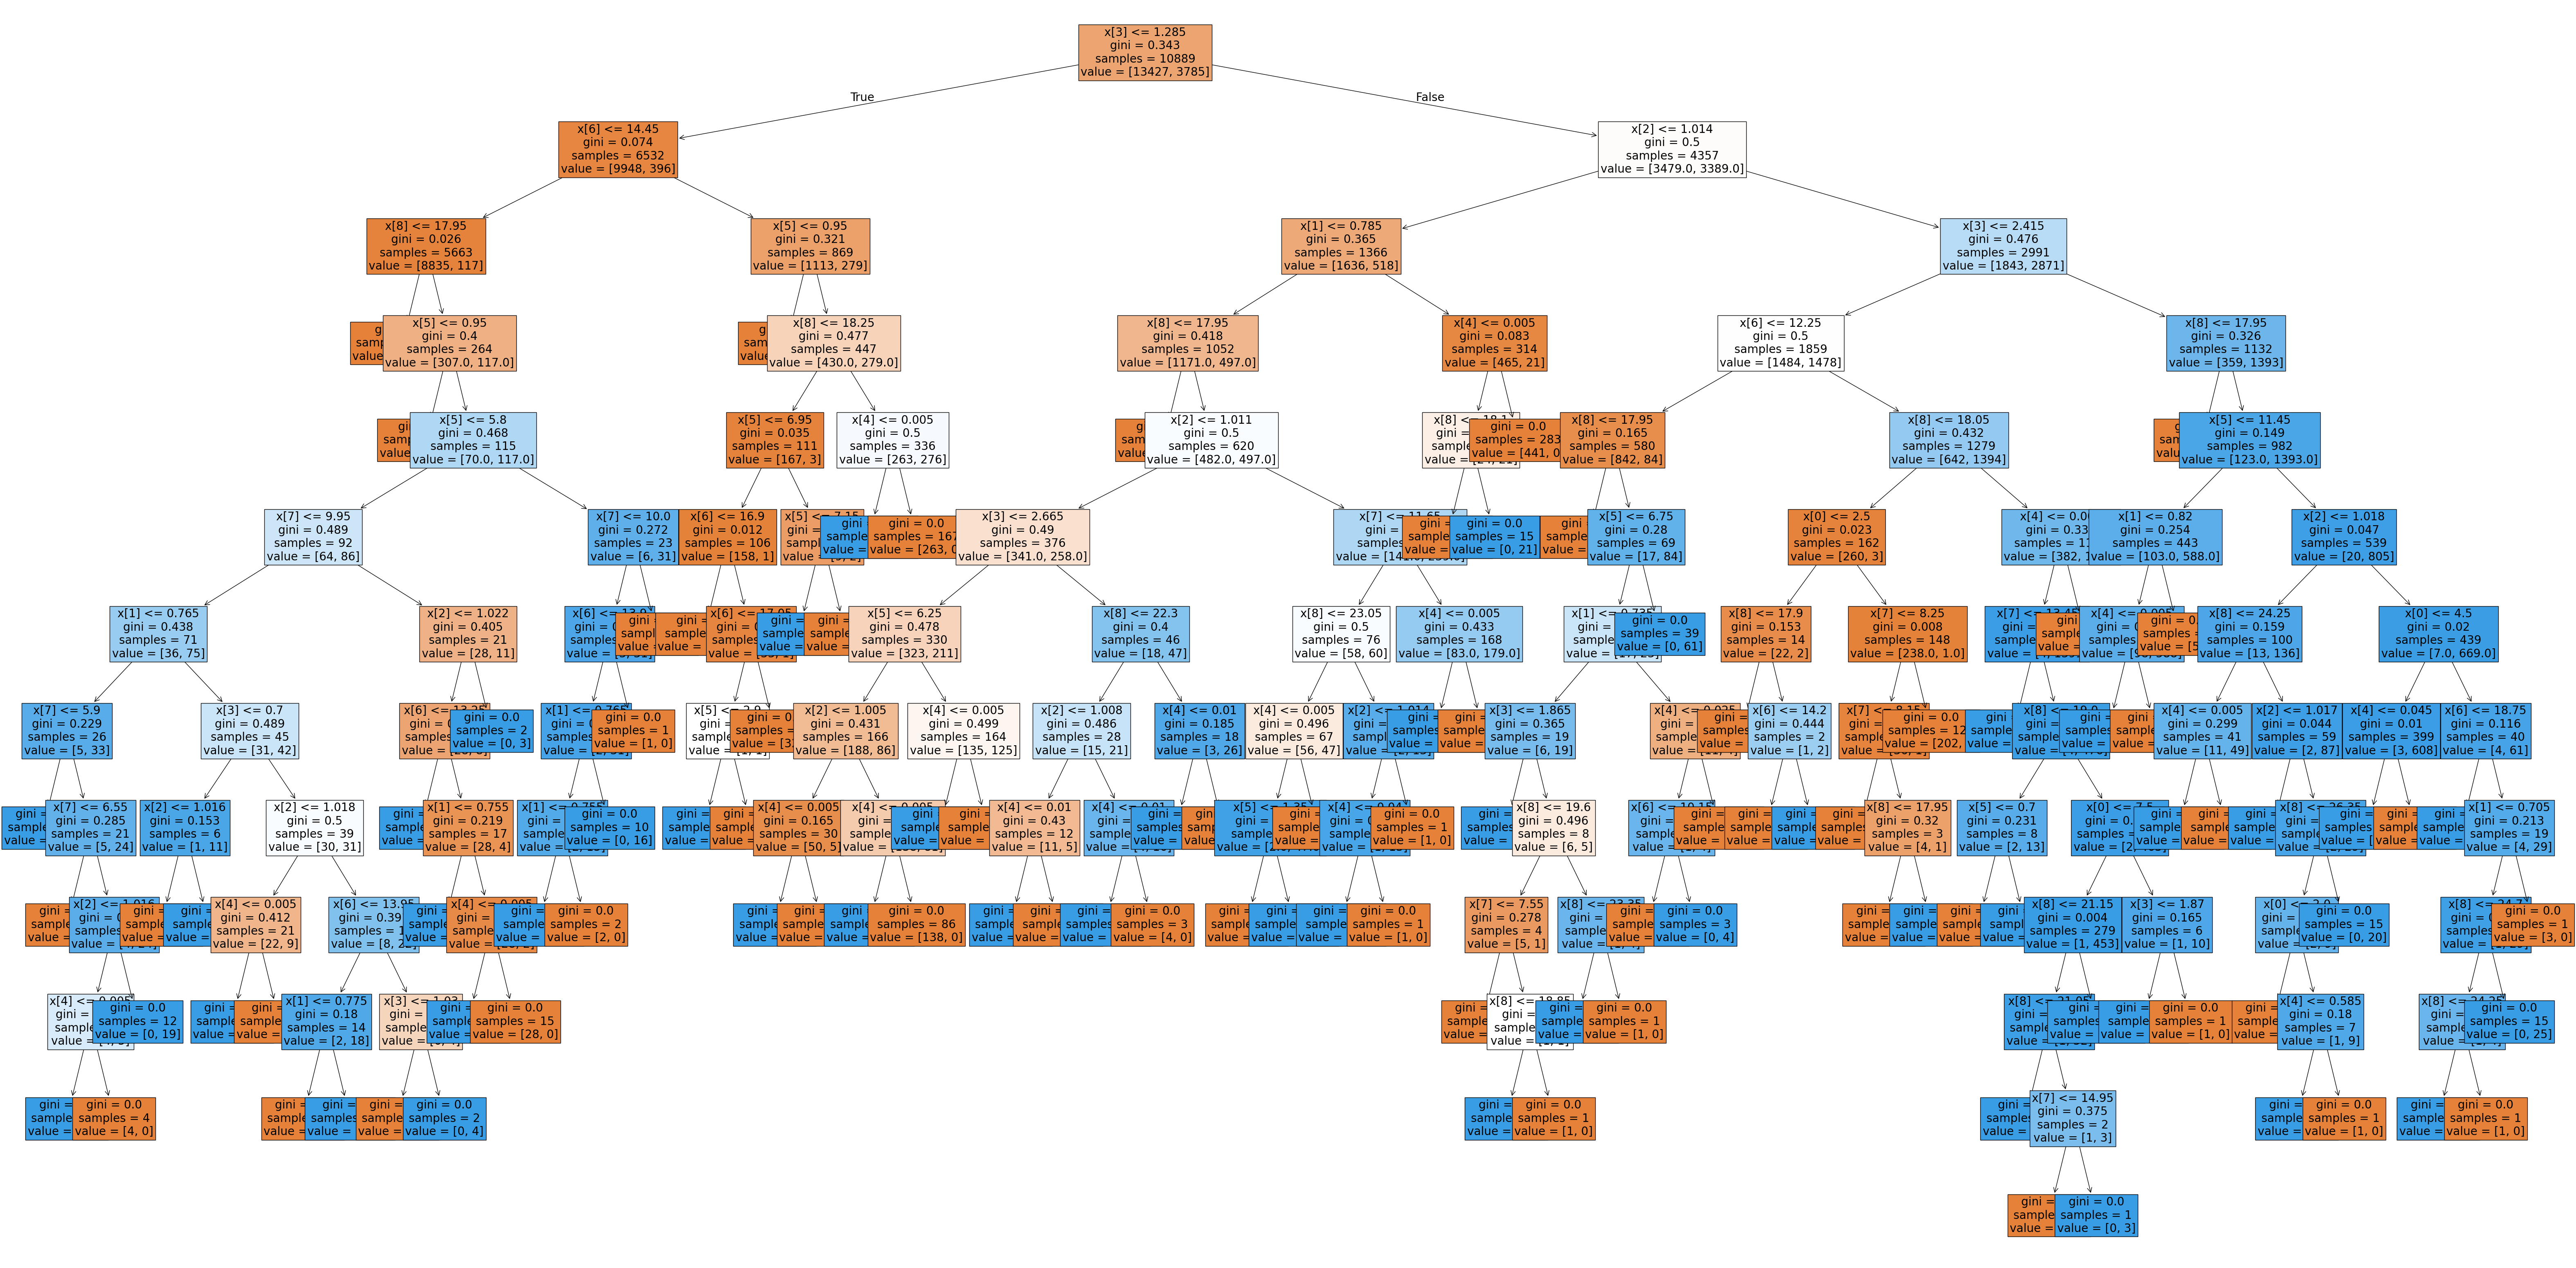

In [23]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [24]:
fig.savefig(os.path.join(path, 'Random_Forest_Heathrow.png'),bbox_inches='tight')

## Feature Importance

In [26]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.0148941 , 0.03610389, 0.02034498, 0.08696269, 0.29381256,
       0.08266058, 0.11351102, 0.01102735, 0.34068282])

In [27]:
# Create a list of weather features

wx_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [28]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.014894
humidity            0.036104
pressure            0.020345
global_radiation    0.086963
precipitation       0.293813
sunshine            0.082661
temp_mean           0.113511
temp_min            0.011027
temp_max            0.340683
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


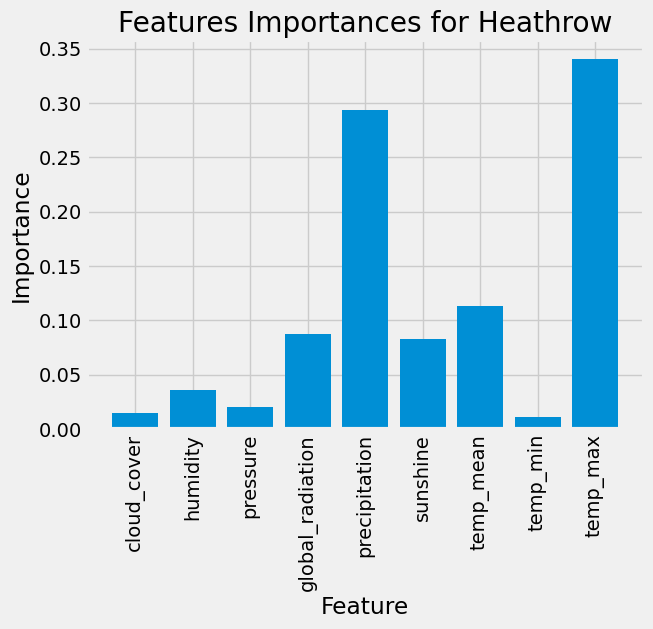

In [29]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow');

plt.savefig(os.path.join(path, 'Feature_Importances_Heathrow.png'), bbox_inches='tight')
plt.show()